<img src="https://shwetkm.github.io/upxlogo.png"></img>

In [1]:
# read the data into a Pandas DataFrame
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


#the daaset has the information of diabetic patients and we need to predict whether a patient has diabetes or not
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)

In [2]:
# print the first 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#the type of each attribute
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
label       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#spread of negative cases and positive cases
pima.groupby('label')['skin'].count()

label
0    500
1    268
Name: skin, dtype: int64

In [5]:
# define  X and y where X are dependent attributes and Y is independent attribute
X = pima.drop('label',1)
y = pima.label

### Training model with train and test split data

In [6]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

C:\Users\mohad\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression #importing from sklearn
logreg = LogisticRegression() #initializing the model
logreg.fit(X_train, y_train) #fitting on train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [9]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.734375


Lets calculate null accuracy and see how good is our model compared to 
base model

Null accuracy: accuracy that could be achieved by always predicting the most frequent class

In [10]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [11]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [12]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [13]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

So the null accuracy score is 0.677 and our model accuracy is little better than null accuracy

### Let's Plot Confusion Matrix

In [14]:
conf = (metrics.confusion_matrix(y_test, y_pred_class))

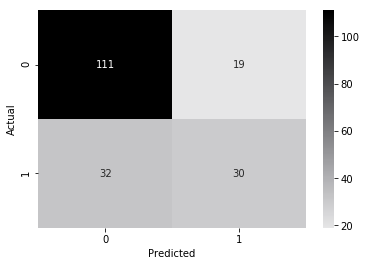

In [15]:
#plotting the confusion matrix
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Let's apply random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=120, criterion='entropy')

In [17]:
rf_clf.fit(X_train, y_train) #fitting the train data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
# make class predictions for the testing set
rf_pred_test = rf_clf.predict(X_test)

In [19]:
print(metrics.accuracy_score(y_test, rf_pred_test))

0.723958333333


In [20]:
#confusion matrix for random forest
rf_conf = (metrics.confusion_matrix(y_test, rf_pred_test))

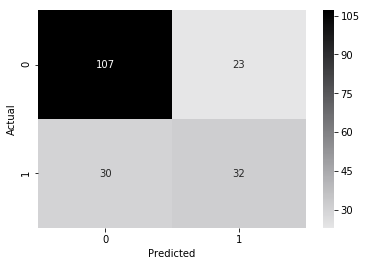

In [22]:
#plotting the confusion matrix
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(rf_conf,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')

Basic terminology

True Positives (TP): we correctly predicted that they do have diabetes

True Negatives (TN): we correctly predicted that they don't have diabetes

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")



Metrics: <img src='art03.fig8.jpg'/>

<img src='metrics.jpg'/>

## Case 1:

Let's understand the metrics in terms of business context

Suppose you are owner of ferrari company and you are manufacturing limited edition super car.

The head of marketing department has 10,000 customer details who they think to advertise..

You have created a model which predicts whether a customer will buy the car or not. According to the model you will advertise to only those which the model tells as buyers

So in this case your model can do two mistakes


1) Precision: Predicts non-buyer as buyer this is false positive (falsely predicting that the customer will buy)

2) Recall : Predicts buyer as non-buyer this is false negative (falsely predicting that the customer will not buy)

### Now which metric do you think is important?

For this case,If model predicts a non-buyer as buyer then company will loose small amount by advertising to non-buyer and the amount they spent on advertising for that person will be low (at most 50$)..this is precision (falsely predicted as positive)..

But on the other side of coin, If model predicts a buyer as non-buyer then the company is not going to advertise the car to that buyer and at the end the company is going to loose that customer who had the potential to buy that car. This is recall (falsely predicted as negative)..

So in this case the recall is the metric to optimize..

### Case 2:

Let's put you in another shoe..

You are manager of a branch and there are 4000 loan applications.

You have created a model which predicts whether an applicant can be granted loan or not..

So in this case your model can do two mistakes

1) Precision: Predicts non-eligible applicants as eligible this is false positive (falsely predicting that the applicant can be granted loan)

2) Recall: Predicts eligible applicants as non-eligible this is false negative (falsely predicting that the loan application should be rejectet.)

### Now which metric do you think is important?

Ask yourself these two questions..

1) What is the loss going to be for bank if you avail loan to non-eligible applicant?

2) What is the loss going to be for bank if you won't avail loan to eligible applicant?

In question 1 the loss is going to be high for bank if you avail loan for non-repayable customer. So in this case i.e falsely predicting as positive will put the bank in trouble cause in future if the applicant is unable to repay the loan then that is loss for bank.

In question 2 the loss is going to be less for bank if you do not avail loan for repayable customer and in this case i.e falsely predicting as negative will not effect the bank as much as false positive, cause the applicant might go to another bank and avail loan and this is not going to put the bank in risk..

Precision is the metric to maximize

### Bonus Question

Which metric is important in this pima dataset?

### Synonyms of metric names

Recall/Sensitivity/True Positive Rate 

Specificity/True Negative Rate 

## F1- Score

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

If you have a specific goal in your mind like 'Precision is the king. I don't care much about recall', then there's no problem. Higher precision is better. But if you don't have such a strong goal, you will want a combined metric. That's F-measure. By using it, you will compare some of precision and some of recall of different models..

F1-Score = 2 (Recall * Precision) / (Recall + Precision)

The closer to 1 the better

In [23]:
#F1-score for logistic model
metrics.f1_score(y_test, y_pred_class)

0.54054054054054057

In [24]:
#F1-score for random forest model
metrics.f1_score(y_test, rf_pred_test)

0.54700854700854706

Say I have a precision of 80% and a recall of 15%. if I create new model with different algorithm so the new model precision is 70% but the recall is 20%.
The first case has  F measure of 25.3%. The second is 31%. Even though your average goes down between the two, it is more important to increase your recall so the precision drop is worth it. The F-score allows you to judge just how much of a tradeoff is worthwhile. If I made my system have a 30% precision and 20% recall, my F-measure would be 24%, and the tradeoff wouldn't be worth it.

### F-beta Score

The beta parameter determines the weight of precision in the combined score. beta < 1 lends more weight to precision, while beta > 1 favors recall (beta -> 0 considers only precision, beta -> inf only recall).

If you are trying to decide between two different models where both has high precison but lower recall which will you choose? One method is to choose the model which has high area under ROC curve another method is to choose model with higher F-beta score.

<img src='F-beta.png'/>

In [25]:
#try different values to understand how change in beta value is effecting the output
metrics.fbeta_score(y_test, y_pred_class, beta=1)

0.54054054054054057

In [26]:
#try different values to understand how change in beta value is effecting the output
metrics.fbeta_score(y_test, rf_pred_test, beta=.05)

0.58163357809808713